# TLX

This evaluates the effect of *Skill* on the TLX variables measured for task performance. Also included are some subjective metrics near the end.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import rpy2

%load_ext rpy2.ipython
%matplotlib inline

In [2]:
reg_palette = sns.color_palette("colorblind", 7)[4:]
sns.set_palette(reg_palette)
sns.set_style("whitegrid")

In [3]:
df = pd.read_csv("../data/tlx.csv", index_col=0)
df

,Technique,User ID,Skill,Metric,Rating
0,Pitch,4g4XbueBXPakEKcHYSqqot76sGg1,2,Mental demand,3
1,Pitch,4g4XbueBXPakEKcHYSqqot76sGg1,2,Physical demand,2
2,Pitch,4g4XbueBXPakEKcHYSqqot76sGg1,2,Temporal demand,2
3,Pitch,4g4XbueBXPakEKcHYSqqot76sGg1,2,Performance,2
4,Pitch,4g4XbueBXPakEKcHYSqqot76sGg1,2,Effort,5
...,...,...,...,...,...
499,Melody,RIneOAfWA6POfHcHOoYEDG1BF6T2,2,Performance,3
500,Melody,RIneOAfWA6POfHcHOoYEDG1BF6T2,2,Effort,3
501,Melody,RIneOAfWA6POfHcHOoYEDG1BF6T2,2,Frustration,4
502,Melody,RIneOAfWA6POfHcHOoYEDG1BF6T2,2,Enjoyability,5


In [15]:
%%R -i df

# Sanitize dataframe column names
library(janitor)
df <- clean_names(df)

df$technique <- factor(df$technique)
df$skill <- factor(df$skill)
df$metric <- factor(df$metric)
df$user_id <- factor(df$user_id)

# TLX stats

## Test for normality


	Shapiro-Wilk normality test

data:  resid(lm(rating ~ technique * skill, data = df))
W = 0.97457, p-value = 1.117e-07



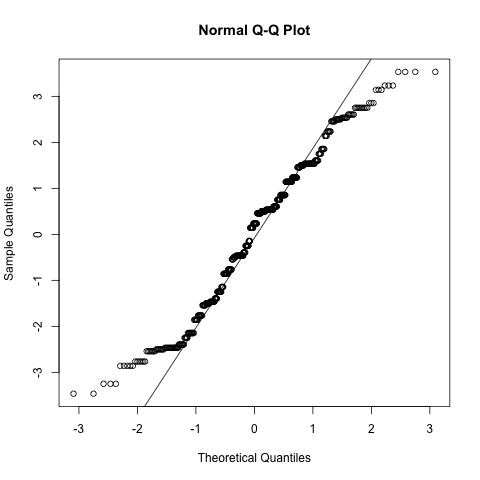

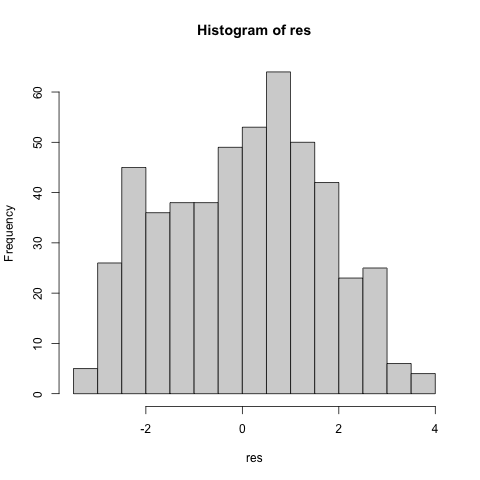

In [5]:
%%R
m = aov(rating ~ technique*skill, data=df)
res = residuals(m)
print(shapiro.test(resid(lm(rating ~ technique*skill, data = df))))
qqnorm(res)
qqline(res)
hist(res)

## Wilcoxian tests

For repeated measures of non-normal data.

### Pitch tests

In [6]:
%%R
technique_df <- subset(df, technique == "Pitch")
for(m in c("Mental demand", "Physical demand", "Temporal demand", "Performance", "Effort", "Frustration", "Background music", "Enjoyability")) {
    print(m)
    curr_df <- subset(technique_df, metric == m)
    print(paste0("0-1 p = ", wilcox.test(rating ~ skill, curr_df, subset = skill %in% c(0, 1))[[3]]))
    print(paste0("0-2 p = ", wilcox.test(rating ~ skill, curr_df, subset = skill %in% c(0, 2))[[3]]))
    print(paste0("1-2 p = ", wilcox.test(rating ~ skill, curr_df, subset = skill %in% c(1, 2))[[3]]))
}

[1] "Mental demand"
[1] "0-1 p = 1"
[1] "0-2 p = 0.103281496600164"
[1] "1-2 p = 0.0326096789304168"
[1] "Physical demand"
[1] "0-1 p = 1"
[1] "0-2 p = 0.813663715766792"
[1] "1-2 p = 0.839317149317559"
[1] "Temporal demand"
[1] "0-1 p = 1"
[1] "0-2 p = 0.0989601540194058"
[1] "1-2 p = 0.166124288160454"
[1] "Performance"
[1] "0-1 p = 0.30081261519192"
[1] "0-2 p = 0.020477021755323"
[1] "1-2 p = 0.0666893546881784"
[1] "Effort"
[1] "0-1 p = 0.824277633329419"
[1] "0-2 p = 0.283430240863794"
[1] "1-2 p = 0.251443338599181"
[1] "Frustration"
[1] "0-1 p = 0.210302885165686"
[1] "0-2 p = 0.00293999255195479"
[1] "1-2 p = 0.0393233565668159"
[1] "Background music"
[1] "0-1 p = 0.512089104973852"
[1] "0-2 p = 0.305941822082805"
[1] "1-2 p = 0.128036028822521"
[1] "Enjoyability"
[1] "0-1 p = 0.208966587721809"
[1] "0-2 p = 0.763552256520381"
[1] "1-2 p = 0.464628277153334"


In [7]:
df[df["Technique"] == "Pitch"].groupby(["Metric", "Skill"]).mean()

Rating
Metric           Skill          
Background music 0      5.000000
                 1      4.500000
                 2      5.750000
Effort           0      5.000000
                 1      4.666667
                 2      4.125000
Enjoyability     0      4.571429
                 1      5.166667
                 2      4.375000
Frustration      0      5.000000
                 1      3.833333
                 2      1.875000
Mental demand    0      4.857143
                 1      5.000000
                 2      4.000000
Performance      0      3.857143
                 1      2.833333
                 2      1.875000
Physical demand  0      3.285714
                 1      3.166667
                 2      3.000000
Temporal demand  0      4.142857
                 1      4.000000
                 2      2.750000

### Interval tests

In [8]:
%%R
technique_df <- subset(df, technique == "Interval")
for(m in c("Mental demand", "Physical demand", "Temporal demand", "Performance", "Effort", "Frustration", "Background music", "Enjoyability")) {
    print(m)
    curr_df <- subset(technique_df, metric == m)
    print(paste0("0-1 p = ", wilcox.test(rating ~ skill, curr_df, subset = skill %in% c(0, 1))[[3]]))
    print(paste0("0-2 p = ", wilcox.test(rating ~ skill, curr_df, subset = skill %in% c(0, 2))[[3]]))
    print(paste0("1-2 p = ", wilcox.test(rating ~ skill, curr_df, subset = skill %in% c(1, 2))[[3]]))
}

[1] "Mental demand"
[1] "0-1 p = 0.363606971223534"
[1] "0-2 p = 0.0589155160423881"
[1] "1-2 p = 0.63571808348122"
[1] "Physical demand"
[1] "0-1 p = 0.435953842845258"
[1] "0-2 p = 1"
[1] "1-2 p = 0.0824725168398431"
[1] "Temporal demand"
[1] "0-1 p = 0.822727691964385"
[1] "0-2 p = 0.104619603450167"
[1] "1-2 p = 0.258984657952375"
[1] "Performance"
[1] "0-1 p = 0.429859774251833"
[1] "0-2 p = 0.20698975177384"
[1] "1-2 p = 0.63571808348122"
[1] "Effort"
[1] "0-1 p = 0.661159452507943"
[1] "0-2 p = 0.375429499731023"
[1] "1-2 p = 0.0486100023289131"
[1] "Frustration"
[1] "0-1 p = 0.413472907527693"
[1] "0-2 p = 0.0182060998603722"
[1] "1-2 p = 0.067683879289482"
[1] "Background music"
[1] "0-1 p = 0.662520583540057"
[1] "0-2 p = 0.812120497573049"
[1] "1-2 p = 0.895315754134628"
[1] "Enjoyability"
[1] "0-1 p = 0.14572853320204"
[1] "0-2 p = 0.34308316713244"
[1] "1-2 p = 0.741622127345889"


In [9]:
df[df["Technique"] == "Interval"].groupby(["Metric", "Skill"]).mean()

Rating
Metric           Skill          
Background music 0      5.142857
                 1      4.833333
                 2      4.875000
Effort           0      4.714286
                 1      5.333333
                 2      4.000000
Enjoyability     0      3.714286
                 1      5.166667
                 2      4.625000
Frustration      0      5.142857
                 1      4.500000
                 2      2.875000
Mental demand    0      5.714286
                 1      5.000000
                 2      4.625000
Performance      0      3.285714
                 1      3.166667
                 2      2.375000
Physical demand  0      4.142857
                 1      3.166667
                 2      4.375000
Temporal demand  0      4.142857
                 1      4.000000
                 2      3.125000

### Melody tests

In [10]:
%%R
technique_df <- subset(df, technique == "Melody")
for(m in c("Mental demand", "Physical demand", "Temporal demand", "Performance", "Effort", "Frustration", "Background music", "Enjoyability")) {
    print(m)
    curr_df <- subset(technique_df, metric == m)
    print(paste0("0-1 p = ", wilcox.test(rating ~ skill, curr_df, subset = skill %in% c(0, 1))[[3]]))
    print(paste0("0-2 p = ", wilcox.test(rating ~ skill, curr_df, subset = skill %in% c(0, 2))[[3]]))
    print(paste0("1-2 p = ", wilcox.test(rating ~ skill, curr_df, subset = skill %in% c(1, 2))[[3]]))
}

[1] "Mental demand"
[1] "0-1 p = 0.551409897694288"
[1] "0-2 p = 0.297376566104951"
[1] "1-2 p = 0.0795857384709796"
[1] "Physical demand"
[1] "0-1 p = 0.767846758892833"
[1] "0-2 p = 0.314672766068999"
[1] "1-2 p = 0.130672182895163"
[1] "Temporal demand"
[1] "0-1 p = 0.184057003067998"
[1] "0-2 p = 0.13739265649151"
[1] "1-2 p = 0.0156170591039307"
[1] "Performance"
[1] "0-1 p = 0.36137454427836"
[1] "0-2 p = 0.0146974217700235"
[1] "1-2 p = 0.103800158745699"
[1] "Effort"
[1] "0-1 p = 0.882145581296006"
[1] "0-2 p = 0.170498911942739"
[1] "1-2 p = 0.0521042086679744"
[1] "Frustration"
[1] "0-1 p = 0.466985261346784"
[1] "0-2 p = 0.0505314493930505"
[1] "1-2 p = 0.127154511555885"
[1] "Background music"
[1] "0-1 p = 0.602773312365896"
[1] "0-2 p = 0.344434840986079"
[1] "1-2 p = 0.506692492948562"
[1] "Enjoyability"
[1] "0-1 p = 0.111054945775908"
[1] "0-2 p = 0.0787428956322423"
[1] "1-2 p = 1"


In [11]:
df[df["Technique"] == "Melody"].groupby(["Metric", "Skill"]).mean()

Rating
Metric           Skill          
Background music 0      4.428571
                 1      4.666667
                 2      5.125000
Effort           0      5.000000
                 1      5.166667
                 2      3.750000
Enjoyability     0      3.571429
                 1      5.166667
                 2      5.250000
Frustration      0      4.857143
                 1      4.166667
                 2      2.875000
Mental demand    0      4.857143
                 1      5.333333
                 2      4.125000
Performance      0      4.142857
                 1      3.333333
                 2      2.125000
Physical demand  0      3.285714
                 1      3.333333
                 2      4.375000
Temporal demand  0      3.857143
                 1      5.166667
                 2      2.500000

# TLX Graphs

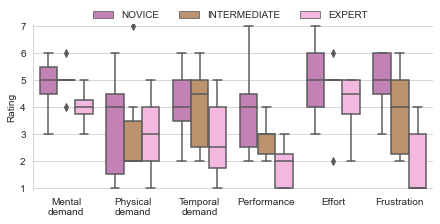

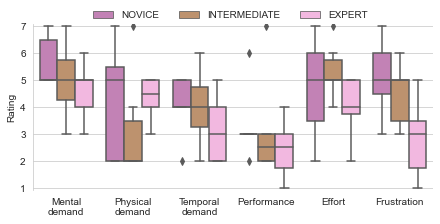

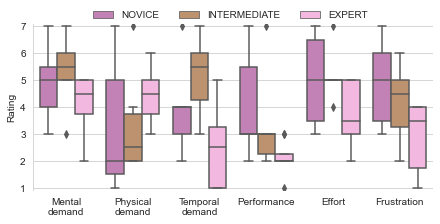

In [12]:
from utils.factorize import factorize_xticks, wrap_factor

skills = ["Novice", "Intermediate", "Expert"]
techniques = ["Pitch", "Interval", "Melody"]

for technique in techniques:
    fig = plt.figure(constrained_layout=True)
    fig.set_figwidth(6)
    fig.set_figheight(3)
    ax = fig.add_subplot()
    sns.boxplot(
        data=df[
            (
                df["Metric"].isin(
                    [
                        "Mental demand",
                        "Physical demand",
                        "Temporal demand",
                        "Performance",
                        "Effort",
                        "Frustration",
                    ]
                )
            )
            & (df["Technique"] == technique)
        ],
        x="Metric",
        y="Rating",
        hue="Skill",
        ax=ax,
    )

    labels = ax.get_xticklabels()
    for label in labels:
        label.set_text("\n".join(label.get_text().split()))
    ax.set_xticklabels(labels)
    ax.set_ylim(ymin=0.9, ymax=7.1)
    ax.set_xlabel(None)

    for idx, text in enumerate(
        ax.legend(loc=(0.14, 1), ncol=3, frameon=False).get_texts()
    ):
        text.set_text(wrap_factor(skills[idx]))

    # Remove spines
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)

# Background music difficulty

This refers to whether people found it easier to do tasks with or without background music

In [13]:
for technique in techniques:
    curr_df = df[(df["Metric"] == "Background music") & (df["Technique"] == technique)]
    print()
    print(f"======== {technique} ========")
    print(len(curr_df[curr_df["Rating"] > 4]), "prefer music")
    print(len(curr_df[curr_df["Rating"] == 4]), "neutral")
    print(len(curr_df[curr_df["Rating"] < 4]), "prefer no music")


======== Pitch ========
15 prefer music
2 neutral
4 prefer no music

======== Interval ========
14 prefer music
3 neutral
4 prefer no music

======== Melody ========
12 prefer music
5 neutral
4 prefer no music


# Enjoyability

In [14]:
for technique in techniques:
    curr_df = df[(df["Metric"] == "Enjoyability") & (df["Technique"] == technique)]
    print()
    print(f"======== {technique} ========")
    print(len(curr_df[curr_df["Rating"] > 4]), "found it enjoyable")
    print(len(curr_df[curr_df["Rating"] < 4]), "found it OK")
    print(len(curr_df[curr_df["Rating"] == 4]), "found it unenjoyable")


======== Pitch ========
13 found it enjoyable
3 found it OK
5 found it unenjoyable

======== Interval ========
12 found it enjoyable
8 found it OK
1 found it unenjoyable

======== Melody ========
13 found it enjoyable
5 found it OK
3 found it unenjoyable
